In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(42)

from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. 데이터 로드

In [2]:
train=pd.read_csv('input/train.csv', index_col=0) #인덱스 col=0도 check!
test=pd.read_csv('input/test.csv', index_col=0)
submission=pd.read_csv('input/sample_submission.csv', index_col=0)  

In [3]:
train['income']=pd.factorize(train['income'], sort=True)[0]

In [4]:
train.drop(['education'],axis=1, inplace=True)
test.drop(['education'],axis=1, inplace=True)

In [ ]:
train.education.value_counts()

In [ ]:
train.education_num.value_counts()

In [ ]:
train.shape, test.shape, submission.shape
train.head(3)
test.head(3)
submission.head(3)

In [ ]:
train.fnlwgt.sort_values()

In [20]:
train.describe()
test.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,imsi,imsi2
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,26049.000000,2.604900e+04,26049.000000
mean,38.569235,3.862452,1.903045e+05,10.088372,2.615801,6.588046,1.448923,3.670928,0.671120,606.615669,87.732734,40.443126,35.812814,0.242044,2.741186e+04,0.242044
std,13.671489,1.463077,1.059663e+05,2.567610,1.505785,4.237671,1.607199,0.843915,0.469815,2582.037241,403.230205,12.361850,7.533400,0.428329,1.226250e+05,0.151912
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,4.000000,1.181080e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000e+00,0.126422
50%,37.000000,4.000000,1.788660e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000e+00,0.226242
75%,48.000000,4.000000,2.377350e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000,0.000000e+00,0.451271
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41310.000000,4356.000000,99.000000,40.000000,1.000000,2.045700e+06,0.490758


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,imsi,imsi2
count,6512.000000,6512.000000,6.512000e+03,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6.512000e+03,6512.000000
mean,38.631296,3.894656,1.876738e+05,10.049908,2.595977,6.511517,1.436118,3.645577,0.661548,553.656821,85.588145,40.414773,36.527488,2.413235e+04,0.241274
std,13.516418,1.426957,1.038493e+05,2.593033,1.507979,4.193176,1.605140,0.867863,0.473219,2444.595142,401.904741,12.290491,8.203834,1.113721e+05,0.152675
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,4.000000,1.165042e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000e+00,0.126422
50%,37.000000,4.000000,1.768820e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000e+00,0.226242
75%,48.000000,4.000000,2.358508e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000e+00,0.451271
max,90.000000,8.000000,1.125613e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41310.000000,4356.000000,99.000000,41.000000,2.065500e+06,0.490758


In [ ]:
train.describe(include='O')
test.describe(include='O')

In [ ]:
train.native_country.value_counts()

In [ ]:
test.native_country.value_counts()

In [ ]:
train.groupby('native_country')['income'].mean().sort_values()

In [ ]:
sns.distplot(train.hours_per_week)

In [ ]:
sns.distplot(test.hours_per_week)

In [ ]:
train.hours_per_week.max(), test.hours_per_week.max()

In [ ]:
train[train.hours_per_week == 99].corr()

# 2. EDA & 전처리

### 공통 함수 

In [5]:
def distplots(col):
    f, ax = plt.subplots(1,2, figsize=(16,5))
    sns.distplot(train[col], ax=ax[0])
    sns.distplot(test[col], ax=ax[1])

In [6]:
def boxplots(col):
    f, ax = plt.subplots(1,2, figsize=(16,5))
    sns.boxplot(train[col], ax=ax[0])
    sns.boxplot(test[col], ax=ax[1])

In [7]:
def kdeplots(col):
    fig, ax = plt.subplots(1, 1, figsize=(9, 5))
    sns.kdeplot(train[train['income'] == 0][col], ax=ax, bw=1.5)
    sns.kdeplot(train[train['income'] == 1][col], ax=ax, bw=1.5)
    plt.legend(['income == 0', 'income == 1'])
    plt.show()

In [8]:
def value_counts(col):
    print(train[col].value_counts(), '\n')
    print(test[col].value_counts())

In [9]:
def fn_ratio(col):
    print(train.groupby(col)['income'].mean())

In [10]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [ ]:
sns.pairplot(train)

In [ ]:
for f in ['age', 'workclass', 'fnlwgt', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'
         ]:
    sns.lmplot(x=f, y="income", data=train)    

In [12]:
train['imsi'] = train.capital_gain*train.hours_per_week#*train.capital_loss
test['imsi'] = test.capital_gain*test.hours_per_week#*train.capital_loss

In [ ]:
train['capital_plus'] = train.capital_gain + train.capital_loss
train['capital_minus'] = train.capital_gain - train.capital_loss
train['imsi2'] = train.capital_plus*train.capital_minus
train['imsi3'] = train.capital_loss*train.education_num

for f in ['imsi3','capital_gain', 'capital_loss','imsi','imsi2']:
    kdeplots(f)

In [ ]:
for f in ['age','education_num','imsi']:
    kdeplots(f)

In [32]:
train.loc[train['capital_gain'] > 3000, 'capital_gain'] = 596.0242247798003
test.loc[test['capital_gain'] > 3000, 'capital_gain'] = 596.0242247798003

<AxesSubplot:xlabel='capital_gain'>

74.38494502078524

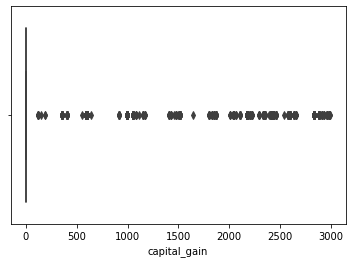

In [34]:
df = pd.concat([train, test])
sns.boxplot(df['capital_gain'])
df.capital_gain.mean()

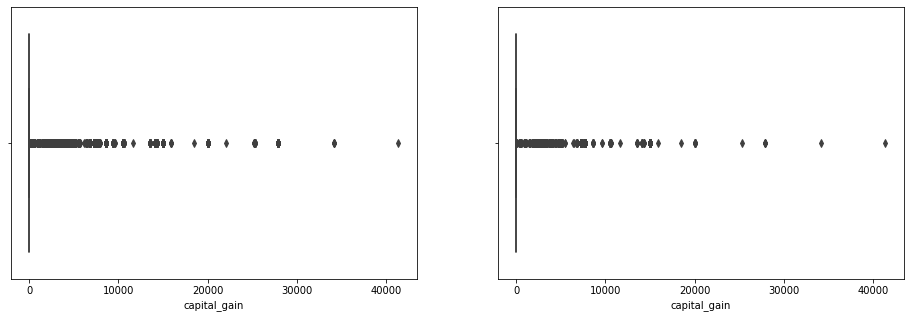

In [30]:
boxplots('capital_gain')

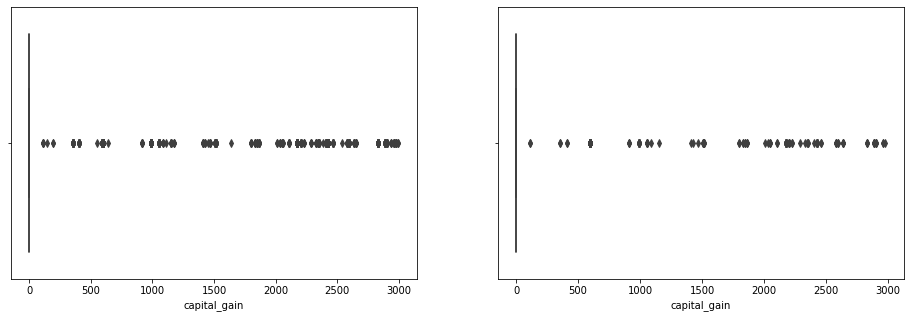

In [33]:
boxplots('capital_gain')

In [ ]:
var = 800000
train.loc[train['fnlwgt'] > var, 'fnlwgt'] = var + np.random.randint(0,1000)
test.loc[test['fnlwgt'] > var, 'fnlwgt'] = var + np.random.randint(0,1000)

In [ ]:
boxplots('fnlwgt')

In [ ]:
df = pd.concat([train, test])
df.shape

In [ ]:
train.info()

## Missing Value

In [ ]:
train.isnull().sum().sum()
test.isnull().sum().sum()

## Target 분포

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))

train['income'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
sns.countplot('income', data=train, ax=ax[1])

plt.show()

# 균일

In [ ]:
pd.factorize(train['workclass'], sort=True)[1]
pd.factorize(test['workclass'], sort=True)[1]

pd.factorize(train['marital_status'], sort=True)[1]
pd.factorize(test['marital_status'], sort=True)[1]

pd.factorize(train['occupation'], sort=True)[1]
pd.factorize(test['occupation'], sort=True)[1]

pd.factorize(test['relationship'], sort=True)[1]
pd.factorize(train['relationship'], sort=True)[1]

pd.factorize(train['race'], sort=True)[1]
pd.factorize(test['race'], sort=True)[1]

pd.factorize(train['sex'], sort=True)[1]
pd.factorize(test['sex'], sort=True)[1]

pd.factorize(test['native_country'], sort=True)[1]
pd.factorize(train['native_country'], sort=True)[1]

In [13]:
train['workclass']= pd.factorize(train['workclass'], sort=True)[0]
#train['education']=pd.factorize(train['education'], sort=True)[0]
train['marital_status']=pd.factorize(train['marital_status'], sort=True)[0]
train['occupation']=pd.factorize(train['occupation'], sort=True)[0]
train['relationship']=pd.factorize(train['relationship'], sort=True)[0]
train['race']=pd.factorize(train['race'], sort=True)[0]
train['sex']=pd.factorize(train['sex'], sort=True)[0]
train['native_country']=pd.factorize(train['native_country'], sort=True)[0]

test['workclass']=pd.factorize(test['workclass'], sort=True)[0]
#test['education']=pd.factorize(test['education'], sort=True)[0]
test['marital_status']=pd.factorize(test['marital_status'], sort=True)[0]
test['occupation']=pd.factorize(test['occupation'], sort=True)[0]
test['relationship']=pd.factorize(test['relationship'], sort=True)[0]
test['race']=pd.factorize(test['race'], sort=True)[0]
test['sex']=pd.factorize(test['sex'], sort=True)[0]
test['native_country']=pd.factorize(test['native_country'], sort=True)[0]

In [ ]:
train['income']=pd.factorize(train['income'], sort=True)[0]

In [ ]:
train['native_country'].replace(['Honduras','Holand-Netherlands','Outlying-US(Guam-USVI-etc)'],['H','H','H'],inplace=True)
test['native_country'].replace(['Honduras','Holand-Netherlands','Outlying-US(Guam-USVI-etc)'],['H','H','H'],inplace=True)

In [ ]:
train['marital_status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],['Married','Married','Married'],inplace=True)
test['marital_status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],['Married','Married','Married'],inplace=True)

In [ ]:
train.groupby('marital_status')['income'].mean()

In [ ]:
train.groupby('marital_status')['income'].mean()

In [ ]:
for f in test.columns:
    distplots(f)

In [ ]:
train.shape

In [ ]:
train.fnlwgt.sort_values(ascending=False)[:10]
test.fnlwgt.sort_values(ascending=False)[:10]

In [ ]:
idx = train.fnlwgt.sort_values(ascending=False)[:3].index
train.drop(idx, axis=0, inplace=True)

In [ ]:
train.shape

In [ ]:
#train.columns
['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [11]:
df = pd.concat([train, test])

df['capital_gain_imsi'] = df['capital_gain'].replace(99999,0)

capital_gain_imsi = pd.DataFrame(df.groupby(['education_num'])['capital_gain_imsi'].mean()).reset_index()

train = train.merge(capital_gain_imsi, on=['education_num'], how='left')
test = test.merge(capital_gain_imsi, on=['education_num'], how='left')

train.loc[train.capital_gain == 99999, 'capital_gain'] = train['capital_gain_imsi']
test.loc[test.capital_gain == 99999, 'capital_gain'] = test['capital_gain_imsi']

train.drop(['capital_gain_imsi'],axis=1, inplace=True)
test.drop(['capital_gain_imsi'],axis=1, inplace=True)

In [ ]:
sns.boxplot(train['capital_gain'])

In [ ]:
sns.boxplot(test['capital_gain'])

In [ ]:
train['capital_gain_income'] = train['capital_gain'] * train['income']

In [ ]:
sns.boxplot(train['capital_gain_income'])

In [18]:
df = pd.concat([train, test])

income = pd.DataFrame(df.groupby(['occupation'])['income'].mean()).reset_index()
income.columns = ["occupation","imsi2"]
train = train.merge(income, on=['occupation'], how='left')
test = test.merge(income, on=['occupation'], how='left')

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'corr')

<AxesSubplot:title={'center':'corr'}>

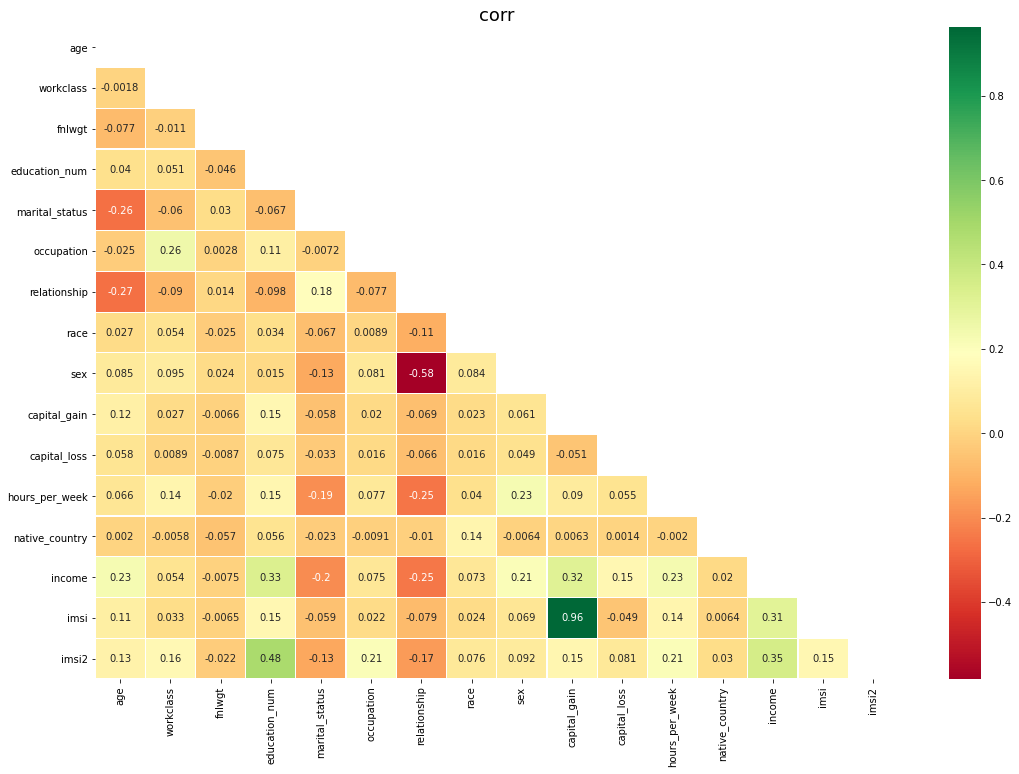

In [19]:
corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 12))
plt.title('corr', fontsize=18)

sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
plt.show()

In [17]:
corr['income'].abs().sort_values(ascending=False)

income            1.000000
education_num     0.334582
capital_gain      0.315004
imsi              0.309576
relationship      0.249249
hours_per_week    0.233726
age               0.229292
sex               0.213780
marital_status    0.200213
capital_loss      0.152537
occupation        0.075156
race              0.073473
workclass         0.054292
native_country    0.019633
fnlwgt            0.007500
Name: income, dtype: float64

In [ ]:
corr['workclass'].sort_values(ascending=False)
train.workclass.value_counts()
test.workclass.value_counts()

In [ ]:
corr['occupation'].sort_values(ascending=False)
train.occupation.value_counts()
test.occupation.value_counts()

In [ ]:
corr['native_country'].sort_values(ascending=False)
train.native_country.value_counts()
test.native_country.value_counts()

In [ ]:
train_drop = train[~(train.native_country == '?')]
df_native_country = pd.DataFrame(train_drop.groupby(['race','education_num','native_country'])['native_country'].count())
df_native_country.columns = ['count']
df_native_country = df_native_country.reset_index()
df_native_country_max = pd.DataFrame(df_native_country.groupby(['race','education_num'])['count'].max()).reset_index()
df_native_country_max = df_native_country_max.merge(df_native_country, on=['race','education_num','count'], how='inner').groupby(['race','education_num'])['count','native_country'].max().reset_index().drop('count',axis=1)
train = train.merge(df_native_country_max, on=['race','education_num'], how='left')
train.loc[train.native_country_x == '?','native_country_x'] = train['native_country_y']
train = train.rename(columns={'native_country_x':'native_country'})
train = train.drop('native_country_y', axis=1)
train

In [ ]:
df_native_country = pd.DataFrame(test.groupby(['race','education_num','native_country'])['native_country'].count())
df_native_country.columns = ['count']
df_native_country = df_native_country.reset_index()

idx = df_native_country[(df_native_country.race=='Asian-Pac-Islander') & (df_native_country.education_num==8)& (df_native_country.native_country=='?')].index
df_native_country.drop(idx, axis=0, inplace=True)

df_native_country_max = pd.DataFrame(df_native_country.groupby(['race','education_num'])['count'].max()).reset_index()

df_native_country_max = df_native_country_max.merge(df_native_country, on=['race','education_num','count'], how='inner').groupby(['race','education_num'])['count','native_country'].max().reset_index().drop('count',axis=1)
test = test.merge(df_native_country_max, on=['race','education_num'], how='left')

test.loc[test.native_country_x == '?','native_country_x'] = test['native_country_y'] 

test = test.rename(columns={'native_country_x':'native_country'})
test = test.drop('native_country_y', axis=1)

In [ ]:
df_native_country = pd.DataFrame(test.groupby(['race','education_num','native_country'])['native_country'].count())
df_native_country.columns = ['count']
df_native_country = df_native_country.reset_index()
df_native_country

In [ ]:
idx = df_native_country[(df_native_country.race=='Asian-Pac-Islander') & (df_native_country.education_num==8)& (df_native_country.native_country=='?')].index
df_native_country.drop(idx, axis=0, inplace=True)
df_native_country

In [ ]:
test.native_country.value_counts()

In [ ]:
train.loc[train.native_country_x == '?','native_country_x'] = train['native_country_y'] 

In [ ]:
train = train.rename(columns={'native_country_x':'native_country'})
train = train.drop('native_country_y', axis=1)
train

#### age_group

In [ ]:
def cat_summary(col):
    print('colname: ', col)
    print(train[col].value_counts())
    return pd.crosstab(train[col], train['voted0'], margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
def cat_plot(col):
    print('colname: ', col)
    return train[[col, 'voted0']].groupby([col], as_index=True).mean().sort_values(by='voted0', ascending=False).plot.bar()

In [ ]:
for f in meta[meta.gbn == 'cat'].index:
    cat_summary(f)

In [ ]:
for f in meta[meta.gbn == 'cat'].index:
    cat_plot(f)

In [ ]:
train.columns

In [ ]:
train['imsi2'] = train.age*train.education_num
kdeplots('imsi2')

In [ ]:
for f in test.columns:
    kdeplots(f)

In [ ]:
train_nat = set(train.native_country)

In [ ]:
test_nat = set(test.native_country)

In [ ]:
test_nat-train_nat

In [ ]:
train[train.native_country == 'Holand-Netherlands']

In [ ]:
test[test.native_country == 'Holand-Netherlands']

In [ ]:
train[(train.income == 1) & (train.capital_gain < 5000)]

In [ ]:
train['imsi3']= train.occupation+train.education_num.astype('str')

In [ ]:
train.groupby('imsi3')['income'].mean().sort_values(ascending=False)